In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[4]").appName("main").getOrCreate()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style='whitegrid')

% matplotlib inline

# Import data
Read JSON file and convert to spark DataFame.

In [2]:
data_path = os.path.join('..','..','data','reviews.json')
sdf = spark.read.json(data_path)
sdf.printSchema()

root
 |-- asin: string (nullable = true)
 |-- helpful: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- overall: double (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- unixReviewTime: long (nullable = true)



In [3]:
sdf.show(10)

+----------+-------+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------+
|      asin|helpful|overall|          reviewText| reviewTime|    reviewerID|        reviewerName|             summary|unixReviewTime|
+----------+-------+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------+
|0005019281| [0, 0]|    4.0|This is a charmin...|02 26, 2008| ADZPIG9QOCDG5|Alice L. Larson "...|good version of a...|    1203984000|
|0005019281| [0, 0]|    3.0|It was good but n...|12 30, 2013|A35947ZP82G7JH|       Amarah Strack|Good but not as m...|    1388361600|
|0005019281| [0, 0]|    3.0|Don't get me wron...|12 30, 2013|A3UORV8A9D5L2E|     Amazon Customer|Winkler's Perform...|    1388361600|
|0005019281| [0, 0]|    5.0|Henry Winkler is ...|02 13, 2008|A1VKW06X1O2X7V|Amazon Customer "...|It's an enjoyable...|    1202860800|
|0005019281| [0, 0]|    4.0|This is one of th...|12 22, 2013|A

# Distribution of ratings

In [4]:
rating_dist = sdf.groupby('overall').count().toPandas()

In [5]:
rating_dist

overall   count
0      1.0  104219
1      4.0  382994
2      3.0  201302
3      2.0  102410
4      5.0  906608

Write stuff about how the distribution is unbalanced and that it could pose a challenge as a explicit feedback problem.

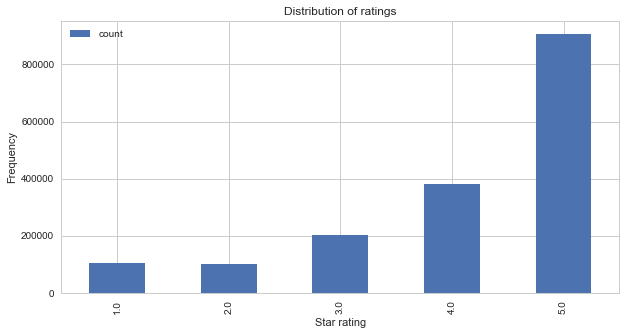

In [6]:
ax = rating_dist.sort_values(by = 'overall').plot(kind='bar', x = 'overall', y = 'count', figsize = (10,5))
ax.set(title = 'Distribution of ratings', xlabel = 'Star rating', ylabel = 'Frequency')

# Average rating per reviewer

[<matplotlib.text.Text at 0x111d29e90>, <matplotlib.text.Text at 0x111897610>]

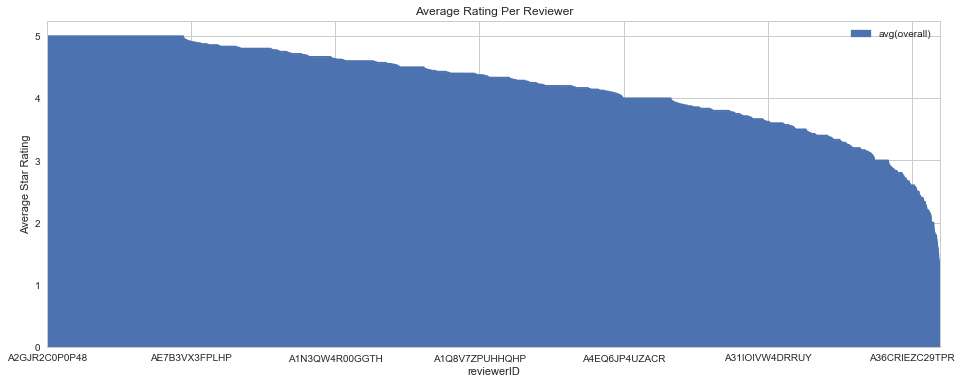

In [13]:
Ave_rate = sdf.groupby("reviewerID").mean().toPandas()
Ave_rate = Ave_rate.sort_values(by = "avg(overall)", ascending = False).reset_index()
ax = Ave_rate.plot(kind = "area", x = "reviewerID", y = "avg(overall)", figsize = (16, 6))
ax.set(title = "Average Rating Per Reviewer", ylabel = "Average Star Rating")

# Number of reviews per reviewer

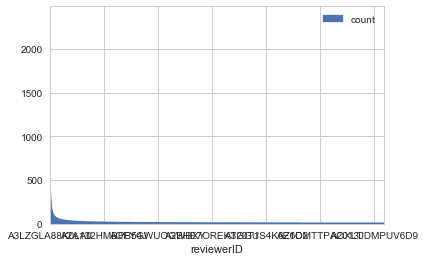

In [17]:
review_counts = sdf.groupby('reviewerID').count().toPandas()
review_counts = review_counts.sort_values(by = 'count', ascending = False)
review_counts.plot(kind = 'area', x = 'reviewerID', y = 'count')

[(0, 500)]

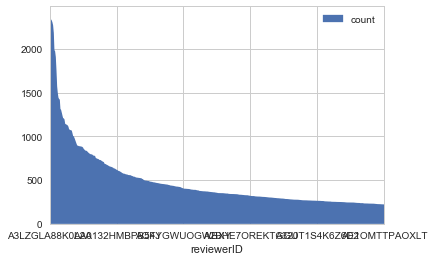

In [19]:
ax = review_counts.plot(kind = 'area', x = 'reviewerID', y = 'count')
ax.set(xlim = (0, 500))

In [32]:
review_counts['count'].describe()

count    123960.000000
mean         13.694200
std          39.750989
min           5.000000
25%           5.000000
50%           7.000000
75%          11.000000
max        2368.000000
Name: count, dtype: float64

# Average review per movie

In [47]:
Ave_rate_2

index        asin  avg(overall)  avg(unixReviewTime)
0      21097  B000PSTGDE      5.000000         1.262699e+09
1      13247  B0000A02Y9      5.000000         1.271894e+09
2      15983  B00005ML8S      5.000000         1.033811e+09
3      29320  B0030Y11VK      5.000000         1.323631e+09
4      36547  B000H0MNIU      5.000000         1.261892e+09
5      31052  B000CSTK74      5.000000         1.285390e+09
6      30819  B00177Y9W0      5.000000         1.304398e+09
7      29324  B0036NB2SM      5.000000         1.293546e+09
8      46802  B00CP4Y5V4      5.000000         1.392319e+09
9      20493  B000003NZG      5.000000         1.115122e+09
10     46817  6300150879      5.000000         1.200044e+09
11      1757  B00004UF02      5.000000         1.226275e+09
12     40822  B003C5FMM6      5.000000         1.364429e+09
13     36516  B0002Q9VUC      5.000000         1.334016e+09
14     20456  6300213382      5.000000         1.081642e+09
15     16019  B0001DMXCO      5.000000         1.169960e+09
16      5042  630428635X      5.000000         1.000027e+09
17     36511  B0001LJCL6      5.000000         1.229299e+09
18     11241  B000EGEJIO      5.000000         1.196381e+09
19     46872  B000067IYK      5.000000         1.268698e+09
20     43284  B0033AX1YG      5.000000         1.364822e+09
21     20439  0767018702      5.000000         1.172966e+09
22     46875  B000069HXF      5.000000         1.259548e+09
23     20433  B00GTO6V6S      5.000000         1.398767e+09
24      7328  B00I3RHUX2      5.000000         1.398228e+09
25     36495  B000068GS6      5.000000         1.054236e+09
26     12580  B000WGWZZU      5.000000         1.326776e+09
27     23545  B0027VSTJO      5.000000         1.264913e+09
28     40807  B002EAKWEI      5.000000         1.340703e+09
29      5748  0790741008      5.000000         9.816521e+08
...      ...         ...           ...                  ...
50022  24285  B000VZADO2      1.222222         1.256448e+09
50023   6361  B0009KQP1E      1.222222         1.176854e+09
50024  26415  B00AHTYDZW      1.222222         1.364074e+09
50025  14026  B000BYA5H8      1.217391         1.216388e+09
50026  48942  B0011GDIFQ      1.200000         1.214058e+09
50027  44300  B00519BP1I      1.200000         1.378084e+09
50028  37248  B00023BN2Y      1.200000         1.182643e+09
50029  13871  B005LZW6BU      1.200000         1.365535e+09
50030    207  B00353W296      1.200000         1.358623e+09
50031  23495  B000E5KQHS      1.200000         1.223217e+09
50032  21043  B0002W4SDQ      1.200000         1.230924e+09
50033  30233  B00062IZUY      1.200000         1.163964e+09
50034  35796  B00026L90C      1.166667         1.112803e+09
50035   3417  B004D4YE8S      1.166667         1.386331e+09
50036  49392  B000294TCY      1.166667         1.144166e+09
50037  32300  B000I2KRYE      1.166667         1.228622e+09
50038  27124  B008POPRS8      1.147059         1.365862e+09
50039    200  B002LZAZZ2      1.142857         1.285299e+09
50040  15280  B000ARTMT8      1.100000         1.172172e+09
50041   6136  B000RGX0E0      1.083333         1.309241e+09
50042  10691  B0001ME5DU      1.083333         1.191967e+09
50043   2751  B00005J74W      1.000000         1.055929e+09
50044  47244  B004XZ99D2      1.000000         1.383852e+09
50045  18469  6303334385      1.000000         1.052490e+09
50046  25825  B0010AEQ8Q      1.000000         1.249142e+09
50047  21013  B00007G1YE      1.000000         1.189106e+09
50048   4882  B000E3LIJ0      1.000000         1.199333e+09
50049  49792  B007C8RZPG      1.000000         1.361290e+09
50050  21104  B000YVB81A      1.000000         1.274213e+09
50051   5960  B004LGGXHS      1.000000         1.357275e+09

[50052 rows x 4 columns]

[<matplotlib.text.Text at 0x114f51490>, <matplotlib.text.Text at 0x111506090>]

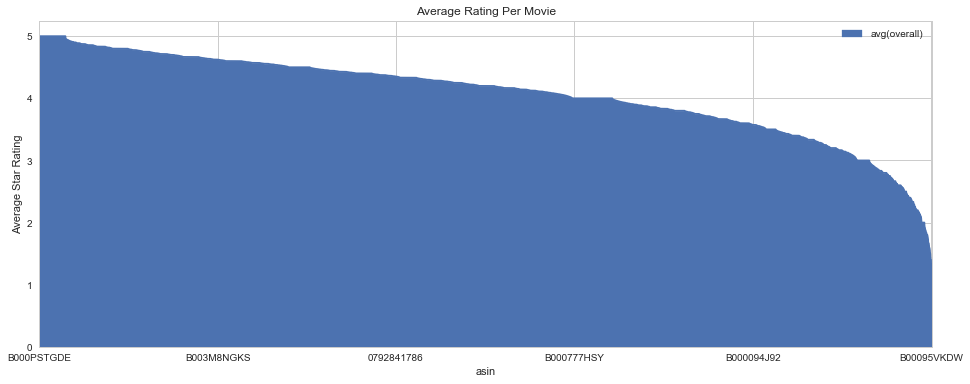

In [46]:
Ave_rate_2 = sdf.groupby("asin").mean().toPandas()
Ave_rate_2 = Ave_rate_2.sort_values(by = "avg(overall)", ascending = False).reset_index()
ax = Ave_rate_2.plot(kind = "area", x = "asin", y = "avg(overall)", figsize = (16, 6))
ax.set(title = "Average Rating Per Movie", ylabel = "Average Star Rating")

[(0, 500)]

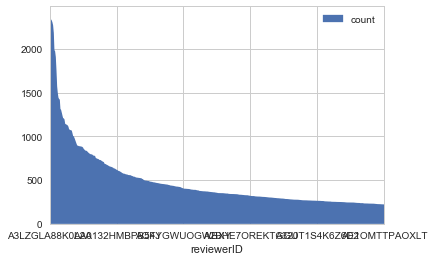

In [19]:
ax = review_counts.plot(kind = 'area', x = 'reviewerID', y = 'count')
ax.set(xlim = (0, 500))

# Number of reviews per movie

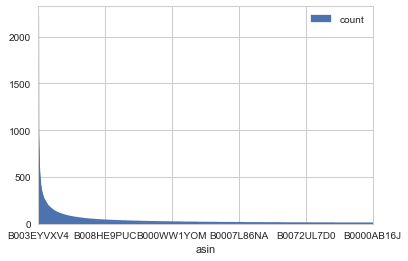

In [42]:
review_counts_2 = sdf.groupby('asin').count().toPandas()
review_counts_2 = review_counts_2.sort_values(by = 'count', ascending = False)
review_counts_2.plot(kind = 'area', x = 'asin', y = 'count')

[(0, 500)]

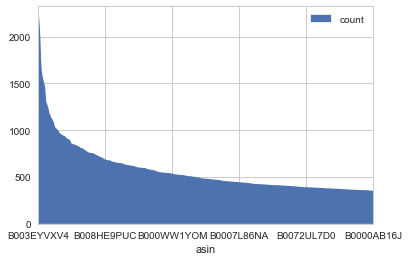

In [44]:
ax = review_counts_2.plot(kind = 'area', x = 'asin', y = 'count')
ax.set(xlim = (0, 500))

In [45]:
review_counts_2['count'].describe()

count    50052.000000
mean        33.915388
std         73.466260
min          5.000000
25%          7.000000
50%         13.000000
75%         29.000000
max       2213.000000
Name: count, dtype: float64

# Number of unique movies and reviewers

In [77]:
n_movies = sdf.select("asin").distinct().count()
n_users = sdf.select("reviewerID").distinct().count()
n_reviews = sdf.select("*").count()
density = n_reviews / float(n_users * n_movies)

In [81]:
print 'number of movies:', n_movies
print 'number of reviewers:', n_users
print 'number of reviews:', n_reviews
print 'density: ' + str(density * 100) + '%'

number of movies: 50052
number of reviewers: 123960
number of reviews: 1697533
density: 0.0273599451408%


In [89]:
1 / density * n_reviews * 4 / 1024 / 1024 / 1024

23.1133621931076